Version 1.0.3

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [22]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [23]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [24]:
# YOUR CODE GOES HERE
print(transactions.shape)
print(items.shape)
print(item_categories.shape)
print(shops.shape)

(2935849, 6)
(22170, 3)
(84, 2)
(60, 2)


In [25]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [26]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [27]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [28]:
transactions['date'] = pd.to_datetime(transactions['date'], format='%d.%m.%Y')
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [30]:
transactions_1409 = transactions[(transactions.date.dt.year == 2014) & (transactions.date.dt.month == 9)]
transactions_1409.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1953691,2014-09-24,20,5,1039,899.0,1.0
1953692,2014-09-27,20,5,1015,449.0,1.0
1953693,2014-09-07,20,5,1329,399.0,1.0
1953694,2014-09-27,20,5,984,399.0,1.0
1953695,2014-09-08,20,5,984,399.0,1.0


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [45]:
# YOUR CODE GOES HERE
transactions_1409['revenue'] = transactions_1409['item_price'] * transactions_1409['item_cnt_day']
print(transactions_1409.groupby('shop_id')['revenue'].agg(sum).max())

max_revenue = 7982852.1999999564
grader.submit_tag('max_revenue', max_revenue)

7982852.2
Current answer for task max_revenue is: 7982852.199999956


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [62]:
transactions_summer2014 = transactions[(transactions.date.dt.year == 2014) & ((transactions.date.dt.month >= 6) & (transactions.date.dt.month <= 8))]
transactions_summer2014.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1705909,2014-06-15,17,26,9532,399.00,1.0
1705910,2014-06-10,17,26,9507,149.00,1.0
1705911,2014-06-13,17,26,9509,246.32,1.0
1705912,2014-06-03,17,26,9532,399.00,1.0
1705913,2014-06-08,17,26,9532,399.00,1.0


In [64]:
transactions_summer2014['revenue'] = transactions_summer2014['item_price'] * transactions_summer2014['item_cnt_day']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
mapping = dict(items[['item_id', 'item_category_id']].values)
mapping

{0: 40,
 1: 76,
 2: 40,
 3: 40,
 4: 40,
 5: 40,
 6: 40,
 7: 40,
 8: 40,
 9: 40,
 10: 40,
 11: 40,
 12: 55,
 13: 40,
 14: 40,
 15: 40,
 16: 40,
 17: 40,
 18: 40,
 19: 40,
 20: 40,
 21: 40,
 22: 40,
 23: 40,
 24: 40,
 25: 40,
 26: 40,
 27: 19,
 28: 30,
 29: 23,
 30: 40,
 31: 37,
 32: 40,
 33: 37,
 34: 40,
 35: 40,
 36: 37,
 37: 40,
 38: 41,
 39: 41,
 40: 57,
 41: 57,
 42: 57,
 43: 40,
 44: 57,
 45: 57,
 46: 57,
 47: 57,
 48: 57,
 49: 57,
 50: 57,
 51: 57,
 52: 57,
 53: 57,
 54: 57,
 55: 43,
 56: 57,
 57: 57,
 58: 78,
 59: 57,
 60: 43,
 61: 43,
 62: 37,
 63: 40,
 64: 40,
 65: 37,
 66: 37,
 67: 40,
 68: 30,
 69: 54,
 70: 49,
 71: 37,
 72: 40,
 73: 40,
 74: 37,
 75: 40,
 76: 37,
 77: 40,
 78: 40,
 79: 40,
 80: 37,
 81: 40,
 82: 37,
 83: 40,
 84: 40,
 85: 37,
 86: 40,
 87: 37,
 88: 40,
 89: 40,
 90: 40,
 91: 37,
 92: 37,
 93: 43,
 94: 40,
 95: 40,
 96: 40,
 97: 40,
 98: 40,
 99: 37,
 100: 40,
 101: 78,
 102: 76,
 103: 76,
 104: 76,
 105: 30,
 106: 30,
 107: 44,
 108: 44,
 109: 57,
 110: 44,


In [83]:
transactions_summer2014['item_category_id'] = transactions_summer2014.item_id.map(mapping)
transactions_summer2014.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,item_category_id
1705909,2014-06-15,17,26,9532,399.00,1.0,399.00,30
1705910,2014-06-10,17,26,9507,149.00,1.0,149.00,40
1705911,2014-06-13,17,26,9509,246.32,1.0,246.32,37
1705912,2014-06-03,17,26,9532,399.00,1.0,399.00,30
1705913,2014-06-08,17,26,9532,399.00,1.0,399.00,30


In [84]:
transactions_summer2014.groupby('item_category_id')['revenue'].agg(sum).sort_values(ascending=False)

item_category_id
20    32157302.43
12    31385229.70
19    26237112.15
23    19896624.03
30    15876623.34
40    12375973.07
55     9468644.35
28     8868913.27
37     7108188.56
3      6854669.80
72     6167981.40
75     5950283.30
15     5047875.80
11     4970925.00
63     3921749.95
35     3658967.10
6      3360382.50
64     3340694.95
22     2958475.70
2      2755520.00
67     2418752.20
38     2418047.46
41     2395884.94
14     2337794.30
29     2286658.00
69     2268859.50
65     2015607.90
62     2005028.90
73     1884406.20
58     1813753.20
         ...     
32      979500.00
76      904313.00
57      850384.80
70      820233.65
43      708957.20
61      698523.80
56      493331.10
8       433200.00
5       418233.10
60      327909.00
9       291426.84
34      248880.00
16      191141.00
17      167175.00
54      128975.00
71       93940.25
45       90326.50
78       55771.00
83       52762.00
4        38833.20
39       37810.70
59        9549.00
77        7385.00
13        4

In [85]:
item_category_id = transactions_summer2014.groupby('item_category_id')['revenue'].agg(sum).argmax()
item_category_id

20

In [86]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = 20
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [104]:
(transactions.groupby(transactions['item_id'])['item_price'].nunique() == 1).sum()

5926

In [105]:
# YOUR CODE GOES HERE

num_items_constant_price = 5926
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [108]:
transactions_1412 = transactions[(transactions.date.dt.year == 2014) & (transactions.date.dt.month == 12)]
transactions_1412.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2192637,2014-12-24,23,42,17279,299.0,1.0
2192638,2014-12-27,23,42,17315,399.0,1.0
2192639,2014-12-24,23,42,17315,399.0,1.0
2192640,2014-12-21,23,42,17315,399.0,1.0
2192641,2014-12-20,23,42,17315,399.0,2.0


In [110]:
transactions_1412_shop25 = transactions_1412[transactions_1412['shop_id'] == 25]
transactions_1412_shop25.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2295837,2014-12-14,23,25,21752,399.0,1.0
2295838,2014-12-13,23,25,21752,399.0,3.0
2295839,2014-12-26,23,25,21733,149.0,1.0
2295840,2014-12-31,23,25,21732,149.0,1.0
2295841,2014-12-30,23,25,21726,149.0,1.0


In [133]:
transactions_1412_shop25.groupby('date')['item_cnt_day'].sum().values.shape

(30,)

In [134]:
transactions_1412_shop25.groupby('date')['item_cnt_day'].sum().index

DatetimeIndex(['2014-12-01', '2014-12-02', '2014-12-03', '2014-12-04',
               '2014-12-05', '2014-12-06', '2014-12-07', '2014-12-08',
               '2014-12-09', '2014-12-10', '2014-12-11', '2014-12-12',
               '2014-12-13', '2014-12-14', '2014-12-15', '2014-12-16',
               '2014-12-17', '2014-12-18', '2014-12-19', '2014-12-20',
               '2014-12-21', '2014-12-22', '2014-12-23', '2014-12-24',
               '2014-12-25', '2014-12-26', '2014-12-27', '2014-12-28',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='date', freq=None)

In [125]:
days = transactions_1412_shop25.date.unique().shape[0]

In [126]:
total_num_items_sold_var = np.var(total_num_items_sold, ddof=1)

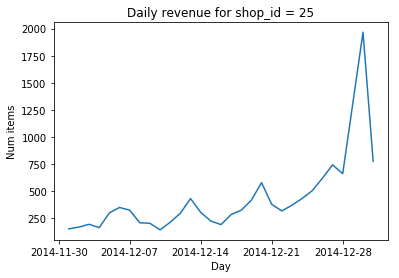

Current answer for task total_num_items_sold_var is: 117167.702299


In [135]:
shop_id = 25

total_num_items_sold = transactions_1412_shop25.groupby('date')['item_cnt_day'].sum().values
days = transactions_1412_shop25.groupby('date')['item_cnt_day'].sum().index

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = np.var(total_num_items_sold, ddof=1)# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [138]:
STUDENT_EMAIL = 'kcsgoodboy@gmail.com'# EMAIL HERE
STUDENT_TOKEN = '8z2TvkPxPcVD88qD'# TOKEN HERE
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.199999956
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.702299


In [139]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)